In [1]:
import gymnasium as gym

import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import time

# 1. Обучение агента

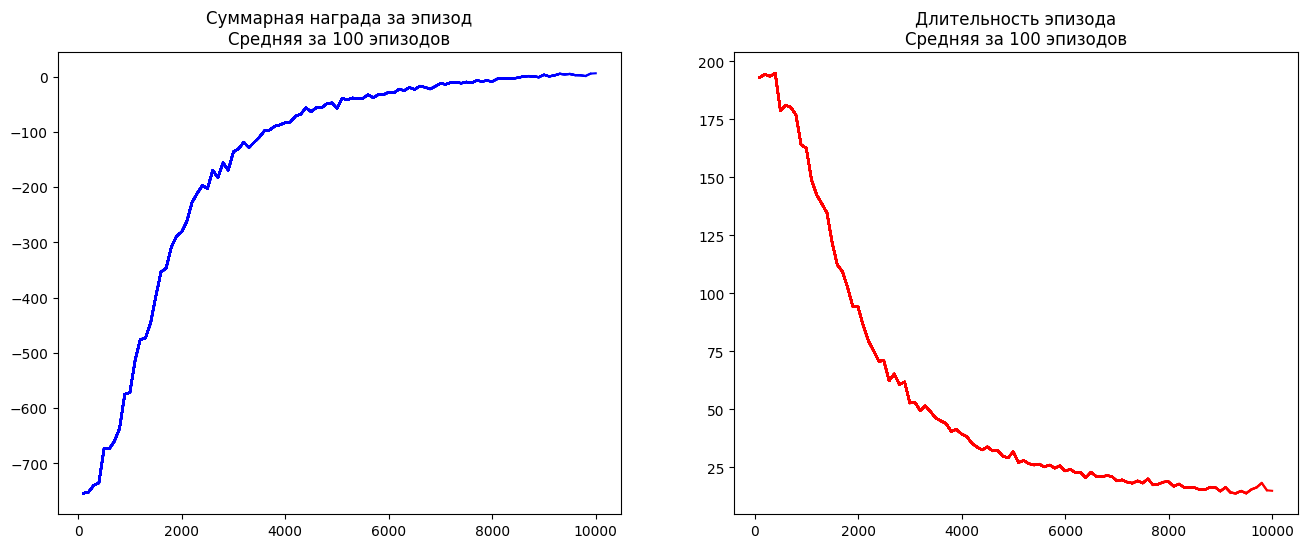

In [2]:
NUM_EPISODES = 10000
WINDOW = 100
ALPHA = 0.1
GAMMA = 0.9

env = gym.make("Taxi-v3", render_mode="rgb_array")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].set_title(f'Суммарная награда за эпизод\nСредняя за {WINDOW} эпизодов')
ax[1].set_title(f'Длительность эпизода\nСредняя за {WINDOW} эпизодов')

space_size = env.observation_space.n
actions_size = env.action_space.n

Q_table = np.random.random((space_size, actions_size))
episode_rewards = np.empty(0)
episode_len = np.empty(0)

for episode in range(1, NUM_EPISODES + 1):
    obs, info = env.reset()
    obs_prime = obs
    initial_frame = env.render()
    episode_over = False
    total_reward = 0
    changes = []
    epsilon = 1. - float(episode) / NUM_EPISODES
    episode_counter = 0

    while not episode_over:
        episode_counter += 1
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[obs, :])
        obs_prime, reward, terminated, truncated, info = env.step(action)

        Q_table[obs, action] = ALPHA * (reward + GAMMA * np.max(Q_table[obs_prime, :]) - Q_table[obs, action])

        obs = obs_prime

        total_reward += reward
        episode_over = terminated or truncated

    episode_rewards = np.append(episode_rewards, total_reward)
    episode_len = np.append(episode_len, episode_counter)
    
    if episode > 0 and episode % WINDOW == 0:
        mean_reward = episode_rewards.reshape(-1, WINDOW).mean(axis=1)
        mean_length = episode_len.reshape(-1, WINDOW).mean(axis=1)

        ax[0].plot(np.arange(0, episode, WINDOW) + WINDOW, mean_reward, c='blue')
        ax[1].plot(np.arange(0, episode, WINDOW) + WINDOW, mean_length, c='red')
        display.display(plt.gcf())
        display.clear_output(wait=True)


env.close()
np.save('Q_table_1_04.npy', Q_table)


In [3]:
loaded_Q_table = np.load('Q_table_1_04.npy')

# 2. Проверка работы агента

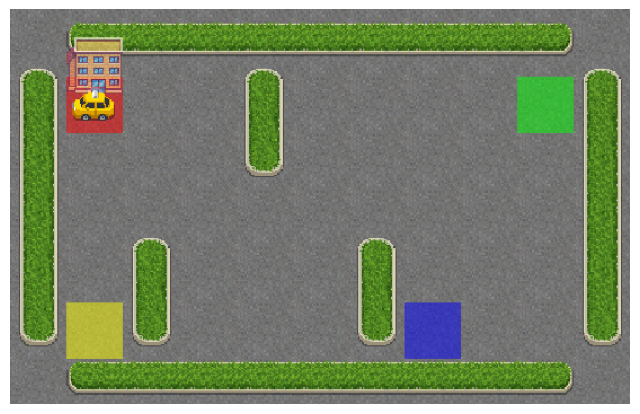

In [6]:
plt.figure(figsize=(8, 6))
plt.axis('off')
env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
obs, info = env.reset()
initial_frame = env.render()
img = plt.imshow(initial_frame)
episode_over = False
while not episode_over:
    action = np.argmax(loaded_Q_table[obs, :])
    obs_prime, reward, terminated, truncated, info = env.step(action)

    frame = env.render()
    img.set_data(frame)

    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.5)

    obs = obs_prime
    episode_over = terminated or truncated
    